<a href="https://colab.research.google.com/github/Ogi-Droid/OpenclassroomsProject7/blob/main/data_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# import packages

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib

import time

import numpy as np
import pandas as pd 

import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,7)

# 1:<span style='background :yellow' ><font color="#902cb7"> **Load data**</font></span>

In [59]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## <span style='background :yellow' ><font color="#902cb7"> **Train data**</font></span>

In [60]:
# Training data
application_train = pd.read_csv('/content/gdrive/My Drive/Data/application_train.csv')
print('Training data shape: ', application_train.shape)
application_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## <span style='background :yellow' ><font color="#902cb7"> **Test data**</font></span>

In [62]:
# Testing data features
application_test = pd.read_csv('/content/gdrive/My Drive/Data/application_test.csv')
print('Testing data shape: ', application_test.shape)
application_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
application_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

# 2: <span style='background :yellow' ><font color="#902cb7"> **Data process**</font></span>

In [64]:
# removal of SK_ID_CURR

# Train
SK_ID_CURR_train = application_train['SK_ID_CURR']
application_train = application_train.drop('SK_ID_CURR',axis = 1)

# Test
SK_ID_CURR_test = application_test['SK_ID_CURR']
application_test = application_test.drop('SK_ID_CURR',axis = 1)


In [65]:
print('Train :' , application_train['TARGET'].value_counts())

Train : 0    282686
1     24825
Name: TARGET, dtype: int64


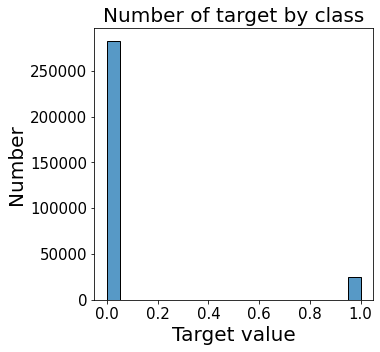

In [66]:
plt.figure(figsize=(5,5))

b = sns.histplot(data=application_train, x="TARGET")
b.axes.set_title("Number of target by class",fontsize=20)
b.set_xlabel("Target value",fontsize=20)
b.set_ylabel("Number",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

### <span style='background :yellow' ><font color="#902cb7"> ** We have less than 9% of categorie 1. **</font></span>

In [67]:
print('number of raw in train data with no Nan is :',application_train.dropna().shape[0])

number of raw in train data with no Nan is : 8602


In [68]:
# select numeric columns

application_train_numeric = application_train.select_dtypes(include=[np.number])
numeric_cols_train = application_train_numeric.columns.values

application_test_numeric = application_test.select_dtypes(include=[np.number])
numeric_cols_test = application_test_numeric.columns.values



# select non numeric columns

application_train_non_numeric = application_train.select_dtypes(exclude=[np.number])
non_numeric_cols_train = application_train_non_numeric.columns.values

application_test_non_numeric = application_test.select_dtypes(exclude=[np.number])
non_numeric_cols_test = application_test_non_numeric.columns.values

print(' train numeric dataframe size :',application_train_numeric.shape)
print('train non numeric dataframe size :', application_train_non_numeric.shape)
print('test numeric dataframe size : ', application_test_numeric.shape)
print('test non numeric dataframe size :', application_test_non_numeric.shape)

 train numeric dataframe size : (307511, 105)
train non numeric dataframe size : (307511, 16)
test numeric dataframe size :  (48744, 104)
test non numeric dataframe size : (48744, 16)


In [69]:
numeric_cols_train

array(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', '

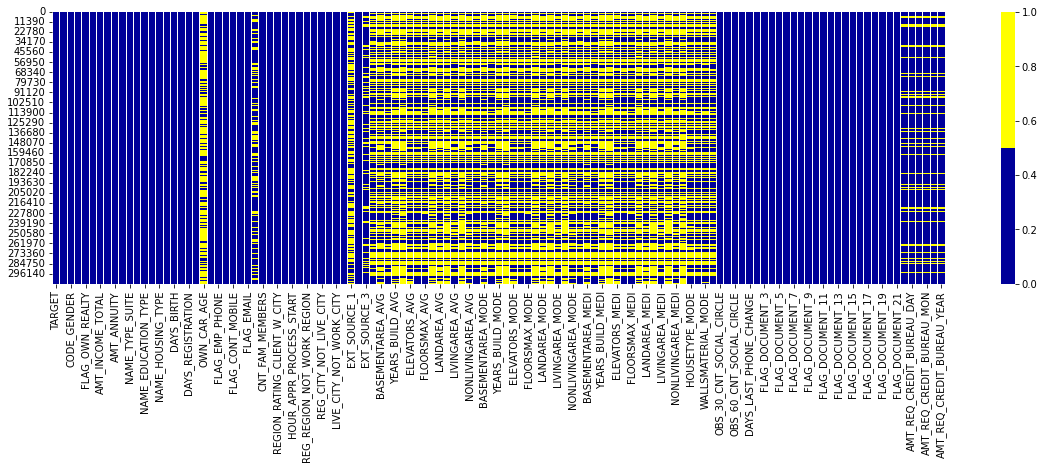

In [70]:
plt.figure(figsize=(20,5))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(application_train.isnull(), cmap=sns.color_palette(colours))

In [71]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
application_train.shape

(307511, 121)

### 2.1 <span style='background :yellow' ><font color="#902cb7"> **numeric columns**</font></span>

In [73]:
# % of missing.
for col in application_train_numeric.columns:
    pct_missing = np.mean(application_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


TARGET - 0%
CNT_CHILDREN - 0%
AMT_INCOME_TOTAL - 0%
AMT_CREDIT - 0%
AMT_ANNUITY - 0%
AMT_GOODS_PRICE - 0%
REGION_POPULATION_RELATIVE - 0%
DAYS_BIRTH - 0%
DAYS_EMPLOYED - 0%
DAYS_REGISTRATION - 0%
DAYS_ID_PUBLISH - 0%
OWN_CAR_AGE - 66%
FLAG_MOBIL - 0%
FLAG_EMP_PHONE - 0%
FLAG_WORK_PHONE - 0%
FLAG_CONT_MOBILE - 0%
FLAG_PHONE - 0%
FLAG_EMAIL - 0%
CNT_FAM_MEMBERS - 0%
REGION_RATING_CLIENT - 0%
REGION_RATING_CLIENT_W_CITY - 0%
HOUR_APPR_PROCESS_START - 0%
REG_REGION_NOT_LIVE_REGION - 0%
REG_REGION_NOT_WORK_REGION - 0%
LIVE_REGION_NOT_WORK_REGION - 0%
REG_CITY_NOT_LIVE_CITY - 0%
REG_CITY_NOT_WORK_CITY - 0%
LIVE_CITY_NOT_WORK_CITY - 0%
EXT_SOURCE_1 - 56%
EXT_SOURCE_2 - 0%
EXT_SOURCE_3 - 20%
APARTMENTS_AVG - 51%
BASEMENTAREA_AVG - 59%
YEARS_BEGINEXPLUATATION_AVG - 49%
YEARS_BUILD_AVG - 66%
COMMONAREA_AVG - 70%
ELEVATORS_AVG - 53%
ENTRANCES_AVG - 50%
FLOORSMAX_AVG - 50%
FLOORSMIN_AVG - 68%
LANDAREA_AVG - 59%
LIVINGAPARTMENTS_AVG - 68%
LIVINGAREA_AVG - 50%
NONLIVINGAPARTMENTS_AVG - 69%
NONLIVING

In [74]:
# fill with median values from train data only :
application_train_numeric = application_train_numeric.fillna(application_train_numeric.median())
application_test_numeric = application_test_numeric.fillna(application_train_numeric.median())

In [75]:
application_train_numeric.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [76]:
application_train_numeric.shape

(307511, 105)

In [77]:
application_train_numeric.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### <span style='background :yellow' ><font color="#902cb7"> **Removal of Correlated columns**</font></span>

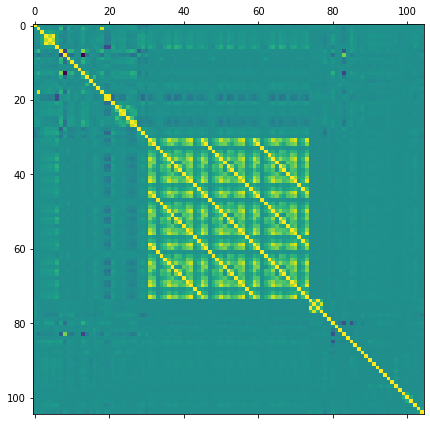

In [78]:
plt.matshow(application_train_numeric.corr())
plt.show()

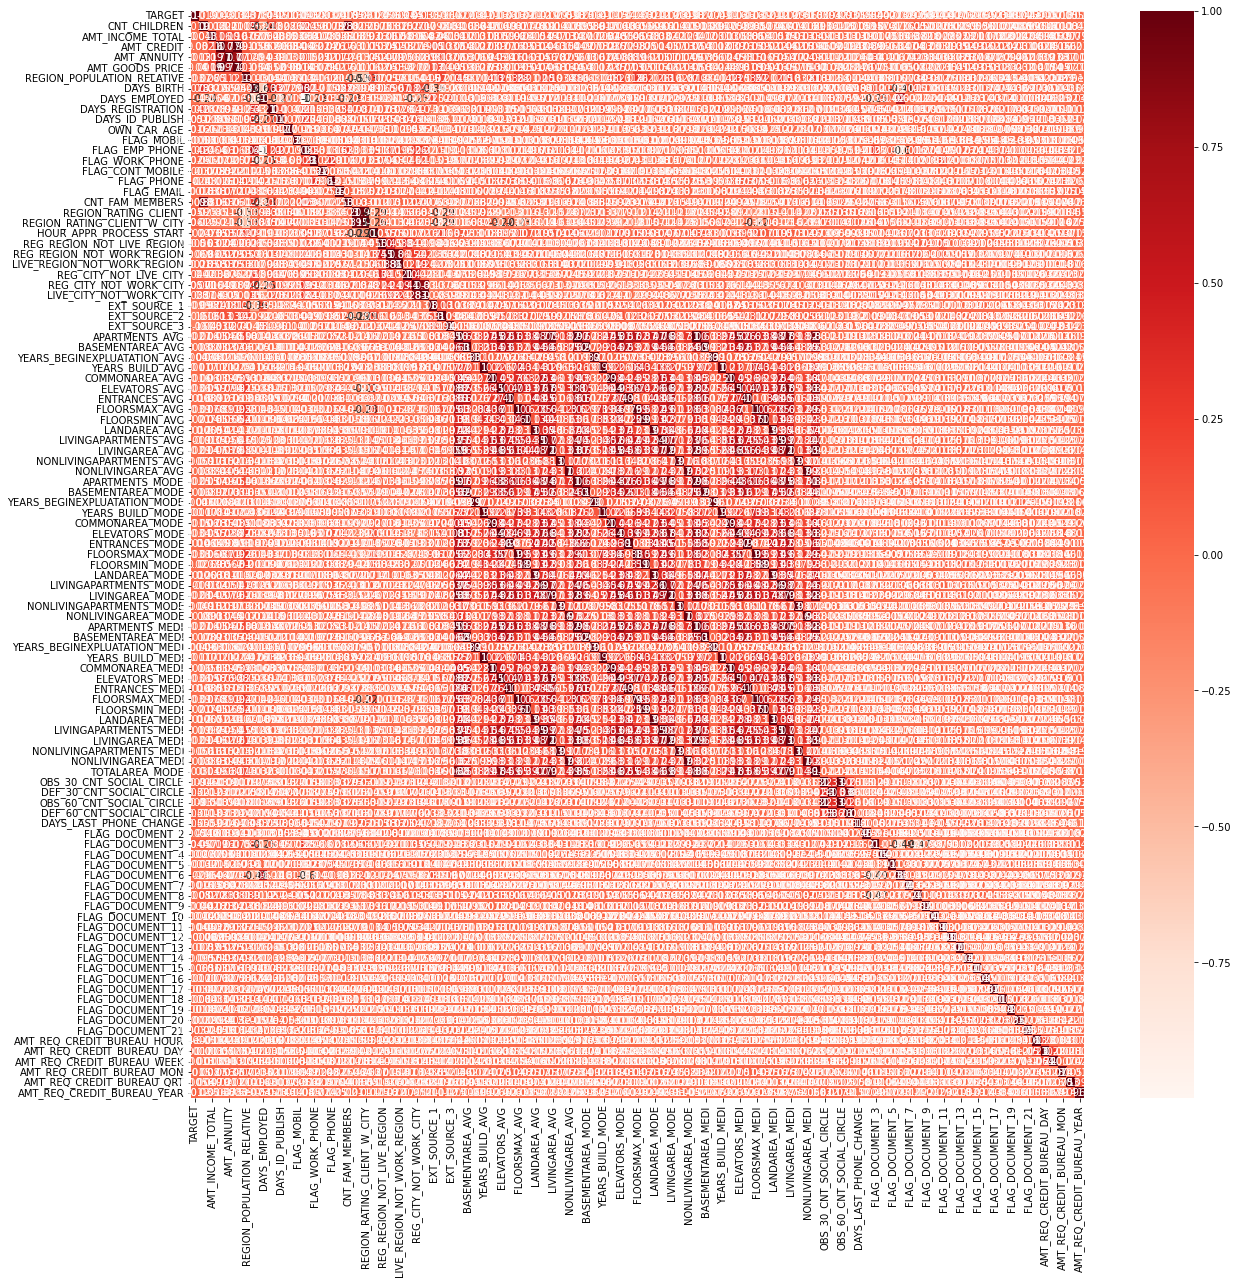

In [79]:
#Pearson Correlation
plt.figure(figsize=(20,20))
cor = application_train_numeric.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [80]:
# Create correlation matrix
corr_matrix = application_train_numeric.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
print('The columns removed are :', to_drop)
# Drop features 
application_train_numeric = application_train_numeric.drop(to_drop, axis=1)

The columns removed are : ['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'YEARS_BUILD_MODE', 'ELEVATORS_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE']


In [81]:
application_train_numeric.shape

(307511, 84)

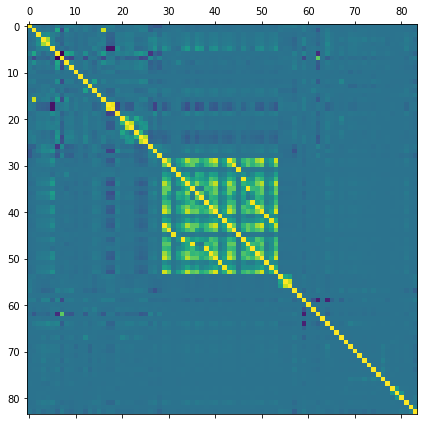

In [82]:
plt.matshow(application_train_numeric.corr())
plt.show()

### 2.2 <span style='background :yellow' ><font color="#902cb7"> **Categorical columns**</font></span>

In [83]:
# % of missing.
for col in application_train_non_numeric.columns:
    pct_missing = np.mean(application_train_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


NAME_CONTRACT_TYPE - 0%
CODE_GENDER - 0%
FLAG_OWN_CAR - 0%
FLAG_OWN_REALTY - 0%
NAME_TYPE_SUITE - 0%
NAME_INCOME_TYPE - 0%
NAME_EDUCATION_TYPE - 0%
NAME_FAMILY_STATUS - 0%
NAME_HOUSING_TYPE - 0%
OCCUPATION_TYPE - 31%
WEEKDAY_APPR_PROCESS_START - 0%
ORGANIZATION_TYPE - 0%
FONDKAPREMONT_MODE - 68%
HOUSETYPE_MODE - 50%
WALLSMATERIAL_MODE - 51%
EMERGENCYSTATE_MODE - 47%


In [84]:
# fill with most frequent value 
application_train_non_numeric = application_train_non_numeric.apply(lambda x:x.fillna(x.value_counts().index[0]))

application_test_non_numeric = application_test_non_numeric.apply(lambda x:x.fillna(x.value_counts().index[0]))

### <span style='background :yellow' ><font color="#902cb7"> **Encoding**</font></span>

In [85]:
"""
Checking  how many classes by categorical columns
"""
A = []
for col in application_train_non_numeric.columns:
    A.append(application_train_non_numeric[col].value_counts().count())
df = pd.DataFrame(A, application_train_non_numeric.columns )
df.columns =['Number of Class'] 
df

,Number of Class
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [86]:
application_train_non_numeric = pd.get_dummies(application_train_non_numeric, prefix_sep='_', drop_first=True)
print(application_train_non_numeric.shape)
application_train_non_numeric.head()

(307511, 124)


,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### <span style='background :yellow' ><font color="#902cb7"> **Concat both numeric and non-numeric**</font></span>

In [87]:
application_train_final = pd.concat([application_train_numeric, application_train_non_numeric], axis=1, join="inner")

In [88]:
application_train_final.shape

(307511, 208)

In [89]:
application_test_final = pd.concat([application_test_numeric, application_test_non_numeric], axis=1, join="inner")
application_test_final.shape

(48744, 120)

### <span style='background :yellow' ><font color="#902cb7"> **Removal of OUTLIERS**</font></span>

In [90]:
application_train_final2 = application_train_final[(np.abs(stats.zscore(application_train_final)) < 20).all(axis=1)]
application_train_final2.shape

(296237, 208)

### <span style='background :yellow' ><font color="#902cb7"> **Delete rows containing either 75% or more than 75% NaN Values**</font></span> 


In [91]:
perc = 75.0 
min_count =  int(((100-perc)/100)*application_train_final2.shape[1] + 1)
mod_application_train_final2 = application_train_final2.dropna( axis=0,thresh=min_count)
mod_application_train_final2.shape

(296237, 208)

### <span style='background :yellow' ><font color="#902cb7"> **Save the Data**</font></span>

In [92]:
mod_application_train_final2.to_csv('application_train_final.csv', index=False)
application_test_final.to_csv('application_test_final.csv', index=False)


#